# Support Vector Machines:

### Example dataset1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

raw_data = loadmat('machine-learning-ex6/ex6/ex6data1.mat')
raw_data

{'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057  , 2.3853  ],
        [1.8721  , 2.0577  ],
        [2.0103  , 2.3546  ],
        [1.2269  , 2.3239  ],
        [1.8951  , 2.9174  ],
     

Text(0.5,1,'Example Dataset 1')

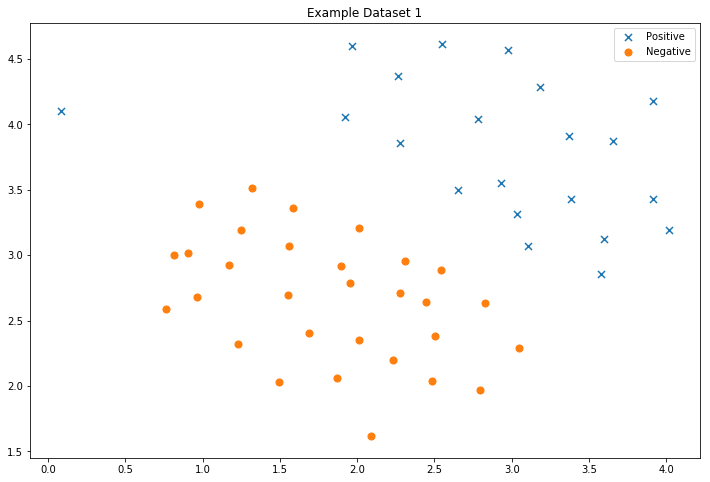

In [2]:
# plot the data in scatter plot
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

pos = data[data['y'].isin([1])]
neg = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pos['X1'], pos['X2'], s=50, marker='x', label='Positive')
ax.scatter(neg['X1'], neg['X2'], s=50, marker='o', label='Negative')
ax.legend()
ax.set_title('Example Dataset 1')

In [3]:
# Train linear SVM to learn the Decision boundary
from sklearn import svm

# first use C=1
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9803921568627451

In [4]:
# with C=1 it misclassify the outlier
# Now let's try with C=100

svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

1.0

The underlying C implementation uses a random number generator to select features when fitting the model. It is thus not uncommon to have slightly different results for the same input data. If that happens, try with a smaller tol parameter.

Text(0.5,1,'SVM(C=1) Decision Confidence')

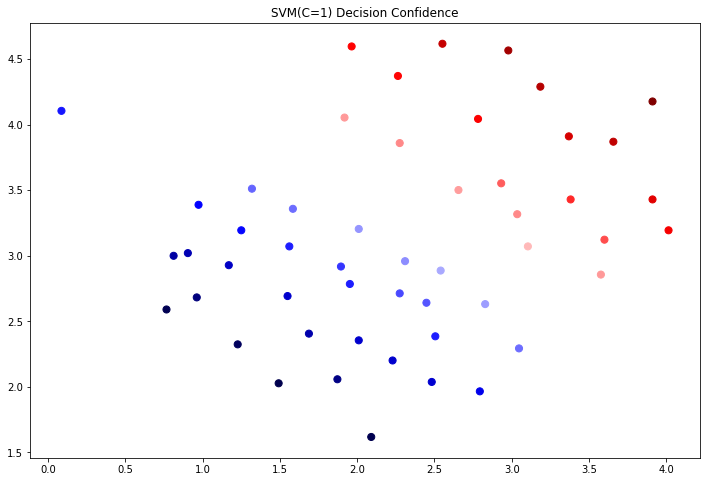

In [5]:
# Visualaize the coonfidence level for each class predictions
data['SVM1 confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 confidence'], cmap='seismic')
ax.set_title('SVM(C=1) Decision Confidence')

Text(0.5,1,'SVM(C=100) Decision Confidence')

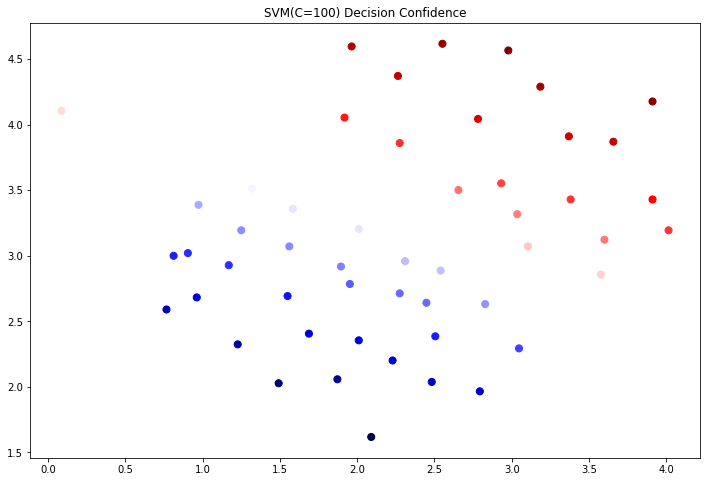

In [6]:
data['SVM2 confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM2 confidence'], cmap='seismic')
ax.set_title('SVM(C=100) Decision Confidence')

### SVM with Gaussian Kernels:

In [7]:
def gaussianKernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

In [8]:
# test the Gaussian function
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussianKernel(x1, x2, sigma)

0.32465246735834974

Text(0.5,1,'Example Dataset 2')

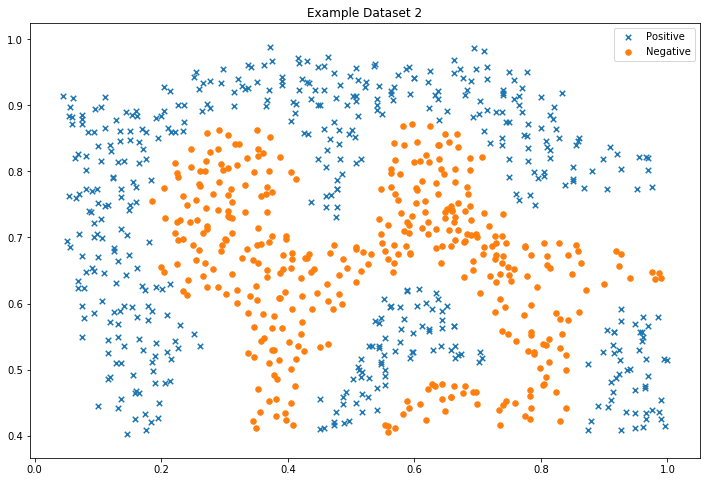

In [9]:
# Example Dataset 2
raw_data2 = loadmat('machine-learning-ex6/ex6/ex6data2.mat')

data2 = pd.DataFrame(raw_data2['X'], columns=['X1', 'X2'])
data2['y'] = raw_data2['y']

pos = data2[data2['y'].isin([1])]
neg = data2[data2['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pos['X1'], pos['X2'], s=30, marker='x', label='Positive')
ax.scatter(neg['X1'], neg['X2'], s=30, marker='o', label='Negative')
ax.legend()
ax.set_title('Example Dataset 2')

In [10]:
# gamma=10 from 1/n(default) changed score from 0.82 to 0.97
svc3 = svm.SVC(C=100, gamma=10, probability=True)
svc3.fit(data2[['X1', 'X2']], data2['y'])
svc3.score(data2[['X1', 'X2']], data2['y'])

0.9698725376593279

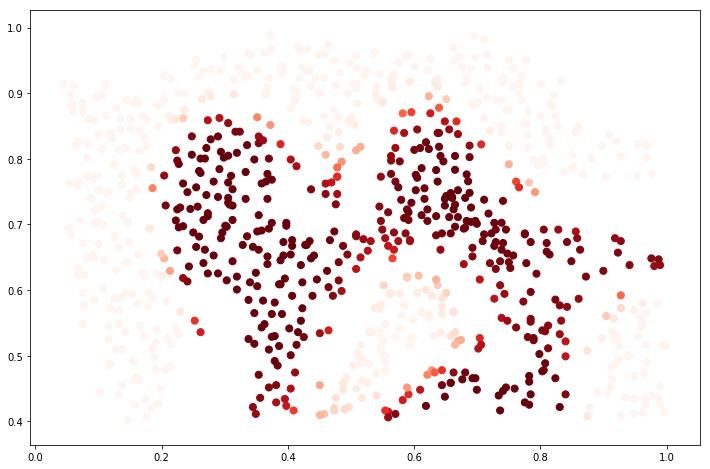

In [11]:
# let's use probability of the dataset to have 
# a negative class label, to visualize the model

data2['negProb'] = svc3.predict_proba(data2[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data2['X1'], data2['X2'], s=50, c=data2['negProb'], cmap='Reds')

### Example Dataset 3:

In [12]:
raw_data3 = loadmat('machine-learning-ex6/ex6/ex6data3.mat')

X3 = raw_data3['X']
y3 = raw_data3['y'].ravel()
X3val = raw_data3['Xval']
y3val = raw_data3['yval'].ravel() # Warning w/o ravel

In [13]:
def params(X, y, Xval, yval):
    values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
    
    bestScore = 0
    bestParams = {}
    for C in values:
        for gamma in values:
            svc = svm.SVC(C=C, gamma=gamma)
            svc.fit(X, y)
            score = svc.score(Xval, yval)
            
            if score > bestScore:
                bestScore = score
                bestParams['C'] = C
                bestParams['gamma'] = gamma
    
    return bestParams, bestScore            

In [14]:
# Estimate the best values for C and gamma
params(X3, y3, X3val, y3val)

({'C': 0.3, 'gamma': 100}, 0.965)

### Spam Classifier:

In [15]:
spamTrain = loadmat('machine-learning-ex6/ex6/spamTrain.mat')
spamTest = loadmat('machine-learning-ex6/ex6/spamTest.mat')

spamTrain, spamTest

({'X': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 1, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  '__globals__': [],
  '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
  '__version__': '1.0',
  'y': array([[1],
         [1],
         [0],
         ...,
         [1],
         [0],
         [0]], dtype=uint8)},
 {'Xtest': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  '__globals__': [],
  '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:39 2011',
  '__version__': '1.0',
  'ytest': array([[1],
         [0],
         [0],
         [1],
         [1],
         [1],
         [1],
         [

In [16]:
Xs = spamTrain['X']
ys = spamTrain['y'].ravel()
Xstest = spamTest['Xtest']
ystest = spamTest['ytest']

In [17]:
# SVM with RBF kernel
svcs = svm.SVC()
svcs.fit(Xs, ys)
svcs.score(Xs, ys)

0.944

In [18]:
svcs.score(Xstest, ystest)

0.953

In [24]:
# Linear SVM (C=1)
svcs2 = svm.LinearSVC()
svcs2.fit(Xs, ys)
svcs2.score(Xs, ys), svcs2.score(Xstest, ystest)

(0.99975, 0.98)

In [23]:
# C = 0.1
svcs3 = svm.LinearSVC(C=0.1)
svcs3.fit(Xs, ys)
svcs3.score(Xs, ys), svcs3.score(Xstest, ystest)

(0.99975, 0.992)